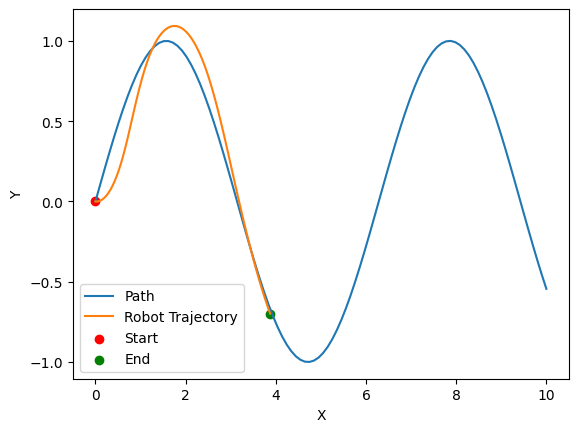

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Sample path (a simple curve for illustration)
path_x = np.linspace(0, 10, 100)
path_y = np.sin(path_x)  # Path is a sine wave

# Parameters
look_ahead_distance = 0.5 # Distance to look ahead on the path
speed = 0.5  # Speed of the robot
dt = 0.1  # Time step

# Initial position of the robot
robot_x = 0.0
robot_y = 0.0
robot_yaw = 0.0  # Initial orientation of the robot

# Helper function to find the closest point on the path
def closest_point_index(robot_x, robot_y, path_x, path_y):
    distances = np.hypot(path_x - robot_x, path_y - robot_y)
    return np.argmin(distances)

# Pure Pursuit Controller
def pure_pursuit_control(robot_x, robot_y, robot_yaw, path_x, path_y, look_ahead_distance):
    index = closest_point_index(robot_x, robot_y, path_x, path_y)
    
    # Find look-ahead point
    for i in range(index, len(path_x)):
        distance = np.hypot(path_x[i] - robot_x, path_y[i] - robot_y)
        if distance > look_ahead_distance:
            target_x = path_x[i]
            target_y = path_y[i]
            break

    # Calculate control to steer towards target point
    angle_to_target = np.arctan2(target_y - robot_y, target_x - robot_x)
    steering_angle = angle_to_target - robot_yaw

    return steering_angle

# Simulation loop
x_trajectory, y_trajectory = [robot_x], [robot_y]
for _ in range(100):
    steering_angle = pure_pursuit_control(robot_x, robot_y, robot_yaw, path_x, path_y, look_ahead_distance)
    
    # Update robot state based on steering
    robot_x += speed * np.cos(robot_yaw) * dt
    robot_y += speed * np.sin(robot_yaw) * dt
    robot_yaw += steering_angle * dt  # simple kinematic model

    # Store the trajectory
    x_trajectory.append(robot_x)
    y_trajectory.append(robot_y)

# Plot the results
plt.plot(path_x, path_y, label="Path")
plt.plot(x_trajectory, y_trajectory, label="Robot Trajectory")
plt.scatter(x_trajectory[0], y_trajectory[0], color='red', label="Start")
plt.scatter(x_trajectory[-1], y_trajectory[-1], color='green', label="End")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()